# MNIST Exercise Notebook

> This notebook contains the the solution for the MNIST Exercise.

In this notebook, we are trying to make an image classification model to classify hand-written digits. 

This dataset is one of the most famous datasets out there, and it has it's own <a href="https://en.wikipedia.org/wiki/MNIST_database">wikipedia page</a>. 

This dataset is contains 70,000 images of hand-writted digits.

![image.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Import the libraries
Importing the Data Science and Machine Learning libraries

* Pandas as pd
* Numpy as np
* Matplotlib as plt
* Scikit-learn

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# We will leave the scikit library as we will only import functions of the library when we need to

## Importing the data

Since the dataset is a csv file, we will need to use `pd.read_csv()` method to read the files.

And since the file is accessible from github, we can directly pass the raw url of the github file.

Also, the dataset is already splited into train and test files, therefore, we will make a variable each

> **Note:** The process of reading the files might take time as we are dealing with huge files

In [2]:
# Read the train dataset
train_dataset = pd.read_csv("https://raw.githubusercontent.com/Sayed-Husain/Introduction-to-Machine-Learning-Workshop/main/Data/mnist_train.csv")

# Read the test dataset
test_dataset = pd.read_csv("https://raw.githubusercontent.com/Sayed-Husain/Introduction-to-Machine-Learning-Workshop/main/Data/mnist_test.csv")

# To confirm that the dataset is what we are expecting, let's check the length of the datasets
print(f"The length of the train dataset = {len(train_dataset)}")
print(f"The length of the test dataset = {len(test_dataset)}")

The length of the train dataset = 55000
The length of the test dataset = 15000


## Understand the dataset

In order to be able to pass the datasets to the model, we first need to understand the data that we have.

In [3]:
train_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row in the training dataset has 785 columns, if we assumed that the `label` column is the target, then what does the other 784 columns refer to?

In [4]:
# Let's check
28*28

784

As our image size is (28,28), the dataset we have have represented the image's pixels with the values of 784 columns.

To confirm, let's try and view the first image of the dataset.

## View the first image

In [5]:
# Create the X and y variables 
X_train = train_dataset.drop("label", axis=1)
y_train = train_dataset["label"]

# Do the same thing for the test dataset
X_test = test_dataset.drop("label", axis=1)
y_test = test_dataset["label"]

In [6]:
# Confirm that the X_train is what we are expecting it to be
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Confirm that the y_train is what we are expecting it to be
y_train.head()

0    8
1    1
2    8
3    4
4    1
Name: label, dtype: int64

Great, as we have the X_train (the images) and y_train (what digit do they represent) data, let's try and view the first image

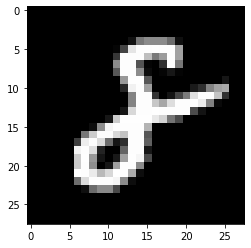

In [8]:
# Make the `first_image` variable and pass it the image pixel values
first_image = X_train.values[0]

# Return it to it's original shape
first_image = first_image.reshape(28,28)

# From the matplotlib library, let's use the imshow function (stands for image show) to view the first image
plt.imshow(first_image, cmap="gray");

The digit looks like number `8`, let's confirm this by looking at the assosiated label

In [9]:
# Check the label of the first image
y_train[0]

8

## Make the model
As this is a classification problem, we are going to use the `RandomForestClassifier()` model from sklearn

In [10]:
# Import RandomForestClassifier model from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Make the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Check the accuracy of the model
model.score(X_test, y_test)

0.9703333333333334

Wow, 97% accuracy, what an amazing model you have created. 

### Well Done